In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd

In [3]:
import os
os.getcwd()

'/Users/ivang/PycharmProjects/pythonProject/notebooks/evaluation'

In [4]:
from dotenv import load_dotenv

load_dotenv()

project_root = os.getenv('PROJECT_ROOT')
print(project_root)
os.chdir(project_root)

/Users/ivang/PycharmProjects/pythonProject/


In [5]:
from src.evaluation.results import Results

[nltk_data] Downloading package punkt to /Users/ivang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
path = os.path.join(project_root)
os.chdir(os.path.join(path, "notebooks/evaluation"))
print(os.getcwd())

/Users/ivang/PycharmProjects/pythonProject/notebooks/evaluation


In [7]:
results = Results("./results", combine_models=True); results.get_keys()

{'basic': ['openml', 'all'], 'dtm': []}

In [8]:
df = results.get_data("openml", aggregated=False)
df

,Dataset,Model,nr_topics,npmi,diversity,params,Dataset_Size,ComputationTime
0,openml,BERTopic_optimized_POS_full_range,10,0.056088,0.762500,"{'nr_topics': 10, 'min_topic_size': 2, 'verbos...",5283,40.630841
1,openml,BERTopic_optimized_POS_full_range,20,0.031206,0.800000,"{'nr_topics': 20, 'min_topic_size': 2, 'verbos...",5283,44.088011
2,openml,BERTopic_optimized_POS_full_range,30,0.028854,0.810714,"{'nr_topics': 30, 'min_topic_size': 2, 'verbos...",5283,49.335086
3,openml,BERTopic_optimized_POS_full_range,40,0.009665,0.771053,"{'nr_topics': 40, 'min_topic_size': 2, 'verbos...",5283,57.803988
4,openml,BERTopic_optimized_POS_full_range,50,-0.000359,0.833333,"{'nr_topics': 50, 'min_topic_size': 2, 'verbos...",5283,59.366530
...,...,...,...,...,...,...,...,...
555,openml,CTM_CUSTOM,30,0.044061,0.736667,"{'n_components': 30, 'contextual_size': 768, '...",5283,99.643121
556,openml,CTM_CUSTOM,40,0.013034,0.635000,"{'n_components': 40, 'contextual_size': 768, '...",5283,99.630080
557,openml,CTM_CUSTOM,50,0.014919,0.612000,"{'n_components': 50, 'contextual_size': 768, '...",5283,94.320311
558,openml,CTM_CUSTOM,100,-0.007898,0.532000,"{'n_components': 100, 'contextual_size': 768, ...",5283,105.609795


In [9]:
for nr_topics in df['nr_topics'].unique():
    subset = df[df['nr_topics'] == nr_topics]
    print(subset)

    Dataset                              Model nr_topics      npmi  diversity  \
0    openml  BERTopic_optimized_POS_full_range        10  0.056088     0.7625   
7    openml                                NMF        10  0.071501     0.5800   
14   openml                                LDA        10  0.018750     0.4000   
21   openml                         CTM_CUSTOM        10 -0.018156     0.9400   
28   openml  BERTopic_optimized_POS_full_range        10  0.059126     0.7750   
..      ...                                ...       ...       ...        ...   
525  openml                                LDA        10  0.014184     0.4400   
532  openml                                NMF        10 -0.014603     0.5500   
539  openml                       BERTopic_POS        10  0.076609     0.7875   
546  openml                                LDA        10  0.020397     0.5300   
553  openml                         CTM_CUSTOM        10  0.055489     0.9900   

                           

In [10]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [11]:
# Dynamically get the unique models from the DataFrame
models = df['Model'].unique()

# List of nr_topics to compare
nr_topics = [10, 20, 30, 40, 50, 100, 200]

# Levene's test for NPMI across models for each nr_topics
for n in nr_topics:
    npmi_data = [df[(df['nr_topics'] == n) & (df['Model'] == model)]['npmi'].dropna() for model in models]
    levene_test_npmi = stats.levene(*npmi_data)
    print(f"Levene's test for npmi (nr_topics={n}): {levene_test_npmi}")

# Bartlett's test for NPMI across models for each nr_topics
for n in nr_topics:
    npmi_data = [df[(df['nr_topics'] == n) & (df['Model'] == model)]['npmi'].dropna() for model in models]
    bartlett_test_npmi = stats.bartlett(*npmi_data)
    print(f"Bartlett's test for npmi (nr_topics={n}): {bartlett_test_npmi}")

# Levene's test for diversity across models for each nr_topics
for n in nr_topics:
    diversity_data = [df[(df['nr_topics'] == n) & (df['Model'] == model)]['diversity'].dropna() for model in models]
    levene_test_diversity = stats.levene(*diversity_data)
    print(f"Levene's test for diversity (nr_topics={n}): {levene_test_diversity}")

# Bartlett's test for diversity across models for each nr_topics
for n in nr_topics:
    diversity_data = [df[(df['nr_topics'] == n) & (df['Model'] == model)]['diversity'].dropna() for model in models]
    bartlett_test_diversity = stats.bartlett(*diversity_data)
    print(f"Bartlett's test for diversity (nr_topics={n}): {bartlett_test_diversity}")

Levene's test for npmi (nr_topics=10): LeveneResult(statistic=1.4664910596808318, pvalue=0.1929980623704595)
Levene's test for npmi (nr_topics=20): LeveneResult(statistic=4.001777060625973, pvalue=0.0009485038528562486)
Levene's test for npmi (nr_topics=30): LeveneResult(statistic=2.9903504849454867, pvalue=0.008209534343590801)
Levene's test for npmi (nr_topics=40): LeveneResult(statistic=2.6661655719622956, pvalue=0.016428059580106572)
Levene's test for npmi (nr_topics=50): LeveneResult(statistic=2.9896106727349356, pvalue=0.008222560702303329)
Levene's test for npmi (nr_topics=100): LeveneResult(statistic=1.0987844195099616, pvalue=0.3732897061270047)
Levene's test for npmi (nr_topics=200): LeveneResult(statistic=2.4366512086844905, pvalue=0.026770486544493145)
Bartlett's test for npmi (nr_topics=10): BartlettResult(statistic=19.34082332248479, pvalue=0.007184117948900951)
Bartlett's test for npmi (nr_topics=20): BartlettResult(statistic=39.64418847219651, pvalue=1.4723530884752958e

Shapiro-Wilk test for npmi: ShapiroResult(statistic=0.9048227263198112, pvalue=3.300002747102998e-18)


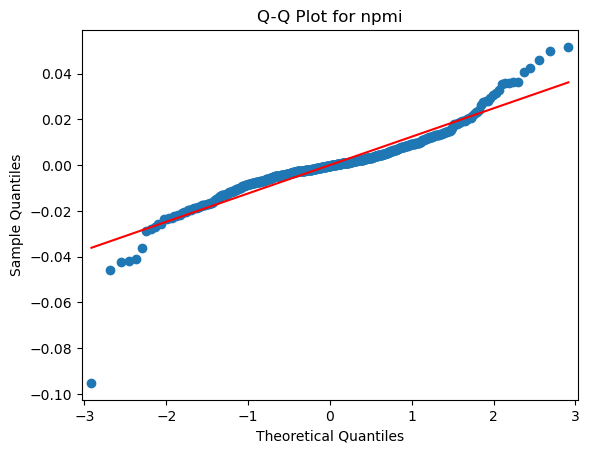

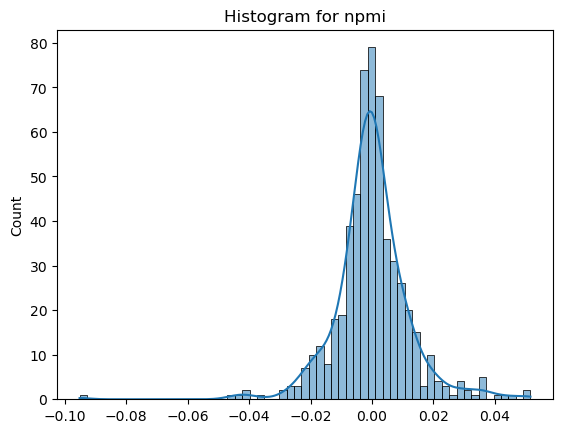

Shapiro-Wilk test for diversity: ShapiroResult(statistic=0.9675713878763215, pvalue=8.705234322262718e-10)


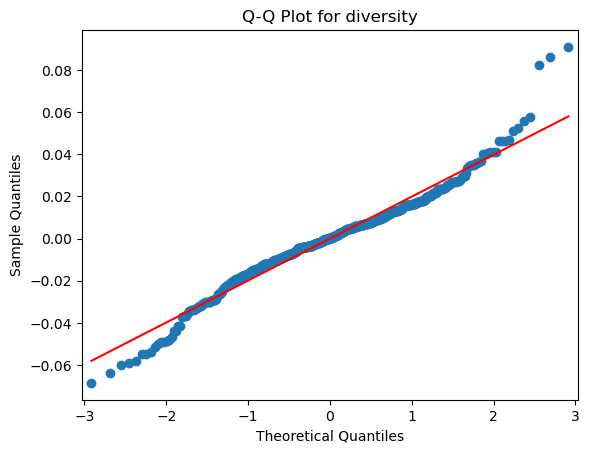

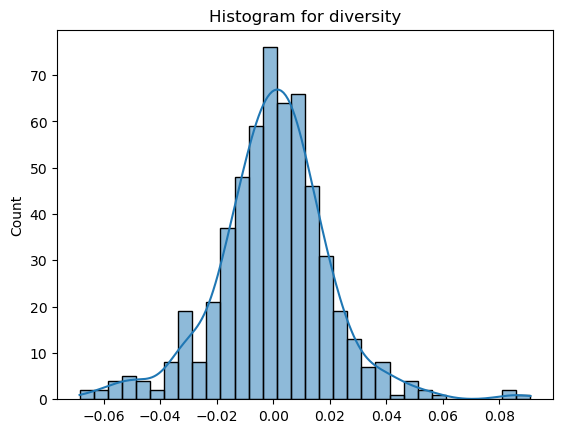

In [12]:
# Model and residuals for npmi
model_npmi = sm.formula.ols('npmi ~ C(Model) * C(nr_topics)', data=df).fit()
residuals_npmi = model_npmi.resid

# Shapiro-Wilk test for npmi
shapiro_test_npmi = stats.shapiro(residuals_npmi)
print(f"Shapiro-Wilk test for npmi: {shapiro_test_npmi}")

# Q-Q plot for npmi
sm.qqplot(residuals_npmi, line='s')
plt.title("Q-Q Plot for npmi")
# save as pdf
plt.savefig("../../latex/thesis/figures/qqplot_npmi.pdf")
plt.show()

# Histogram for npmi
sns.histplot(residuals_npmi, kde=True)
plt.title("Histogram for npmi")
plt.savefig("../../latex/thesis/figures/histogram_npmi.pdf")
plt.show()

# Model and residuals for diversity
model_diversity = sm.formula.ols('diversity ~ C(Model) * C(nr_topics)', data=df).fit()
residuals_diversity = model_diversity.resid

# Shapiro-Wilk test for diversity
shapiro_test_diversity = stats.shapiro(residuals_diversity)
print(f"Shapiro-Wilk test for diversity: {shapiro_test_diversity}")

# Q-Q plot for diversity
sm.qqplot(residuals_diversity, line='s')
plt.title("Q-Q Plot for diversity")
plt.savefig("../../latex/thesis/figures/qqplot_diversity.pdf")
plt.show()

# Histogram for diversity
sns.histplot(residuals_diversity, kde=True)
plt.title("Histogram for diversity")
plt.savefig("../../latex/thesis/figures/histogram_diversity.pdf")
plt.show()

In [13]:
df[df['nr_topics'] == 10]

,Dataset,Model,nr_topics,npmi,diversity,params,Dataset_Size,ComputationTime
0,openml,BERTopic_optimized_POS_full_range,10,0.056088,0.7625,"{'nr_topics': 10, 'min_topic_size': 2, 'verbos...",5283,40.630841
7,openml,NMF,10,0.071501,0.5800,"{'num_topics': 10, 'random_state': 21}",5283,15.453815
14,openml,LDA,10,0.018750,0.4000,"{'num_topics': 10, 'random_state': 100}",5283,4.048956
21,openml,CTM_CUSTOM,10,-0.018156,0.9400,"{'n_components': 10, 'contextual_size': 768, '...",5283,95.758383
28,openml,BERTopic_optimized_POS_full_range,10,0.059126,0.7750,"{'nr_topics': 10, 'min_topic_size': 2, 'verbos...",5283,41.272124
...,...,...,...,...,...,...,...,...
525,openml,LDA,10,0.014184,0.4400,"{'num_topics': 10, 'random_state': 350}",5283,3.827704
532,openml,NMF,10,-0.014603,0.5500,"{'num_topics': 10, 'random_state': 0}",5283,29.411204
539,openml,BERTopic_POS,10,0.076609,0.7875,"{'nr_topics': 10, 'min_topic_size': 15, 'verbo...",5283,56.897711
546,openml,LDA,10,0.020397,0.5300,"{'num_topics': 10, 'random_state': 150}",5283,3.935146


In [14]:
# import statsmodels.api as sm
# from statsmodels.formula.api import ols
# from statsmodels.stats.multicomp import pairwise_tukeyhsd
# import pingouin as pg

# # Perform ANOVA for each topic level
# for nr_topics in df['nr_topics'].unique():
#     subset = df[df['nr_topics'] == nr_topics]
#     print(nr_topics)
#     model = ols('diversity ~ C(Model)', data=subset).fit()
#     anova_table = sm.stats.anova_lm(model, typ=2)
#     print(f'ANOVA for nr_topics={nr_topics}')
#     print(anova_table)

#     # Perform Tukey's HSD test
#     tukey = pairwise_tukeyhsd(endog=subset['diversity'], groups=subset['Model'], alpha=0.05)
#     print(f'Tukey HSD for nr_topics={nr_topics}')
#     print(tukey)

In [15]:
# for nr_topics in df['nr_topics'].unique():
#     subset = df[df['nr_topics'] == nr_topics]
#     model = ols('npmi ~ C(Model)', data=subset).fit()
#     anova_table = sm.stats.anova_lm(model, typ=2)
#     print(f'ANOVA for nr_topics={nr_topics}')
#     print(anova_table)

#     # Perform Tukey's HSD test
#     tukey = pairwise_tukeyhsd(endog=subset['npmi'], groups=subset['Model'], alpha=0.05)
#     print(f'Tukey HSD for nr_topics={nr_topics}')
#     print(tukey)

In [16]:
import pingouin as pg

# Welch's ANOVA for NPMI across models
welch_anova_npmi = pg.welch_anova(dv='npmi', between='Model', data=df)
print("Welch's ANOVA for NPMI:")
print(welch_anova_npmi)

# Welch's ANOVA for Diversity across models
welch_anova_diversity = pg.welch_anova(dv='diversity', between='Model', data=df)
print("\nWelch's ANOVA for Diversity:")
print(welch_anova_diversity)

Welch's ANOVA for NPMI:
  Source  ddof1       ddof2            F          p-unc      np2
0  Model      7  231.601087  2549.359441  3.165650e-215  0.90749

Welch's ANOVA for Diversity:
  Source  ddof1       ddof2            F          p-unc       np2
0  Model      7  232.705375  1091.240484  4.954462e-174  0.815016


In [17]:
# Games-Howell post-hoc test for NPMI across models
games_howell_npmi = pg.pairwise_gameshowell(dv='npmi', between='Model', data=df)
print("\nGames-Howell Post-hoc Test for NPMI:")
print(games_howell_npmi)

# Games-Howell post-hoc test for Diversity across models
games_howell_diversity = pg.pairwise_gameshowell(dv='diversity', between='Model', data=df)
print("\nGames-Howell Post-hoc Test for Diversity:")
print(games_howell_diversity)


Games-Howell Post-hoc Test for NPMI:
                                       A  \
0                           BERTopic_POS   
1                           BERTopic_POS   
2                           BERTopic_POS   
3                           BERTopic_POS   
4                           BERTopic_POS   
5                           BERTopic_POS   
6                           BERTopic_POS   
7                     BERTopic_POS_mpnet   
8                     BERTopic_POS_mpnet   
9                     BERTopic_POS_mpnet   
10                    BERTopic_POS_mpnet   
11                    BERTopic_POS_mpnet   
12                    BERTopic_POS_mpnet   
13     BERTopic_optimized_POS_full_range   
14     BERTopic_optimized_POS_full_range   
15     BERTopic_optimized_POS_full_range   
16     BERTopic_optimized_POS_full_range   
17     BERTopic_optimized_POS_full_range   
18  BERTopic_optimized_POS_reduced_range   
19  BERTopic_optimized_POS_reduced_range   
20  BERTopic_optimized_POS_reduced_ran

Summary of Results

For all nr_topics (10, 20, 30, 40, 50), the p-values are extremely low (all less than 0.05), indicating strong evidence against the null hypothesis. This means that there are statistically significant differences in the diversity metric among the different models for each number of topics.

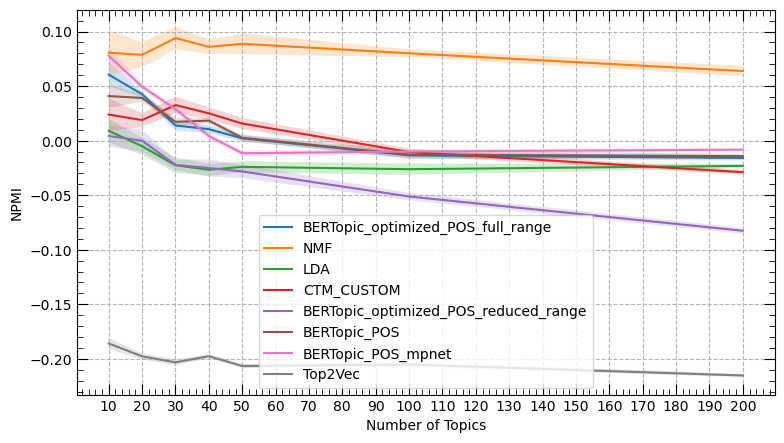

In [27]:
for dataset in results.get_keys()["basic"]:
    if dataset != "all":
        fig = results.plot_results(dataset, x="nr_topics", y="npmi", xlabel="Number of Topics",
                                    ylabel="NPMI", figsize=(9, 5), confidence_interval=True)
        # save fig to pdf file
        fig.savefig(f"../../latex/thesis/figures/{dataset}_npmi.pdf", bbox_inches='tight')

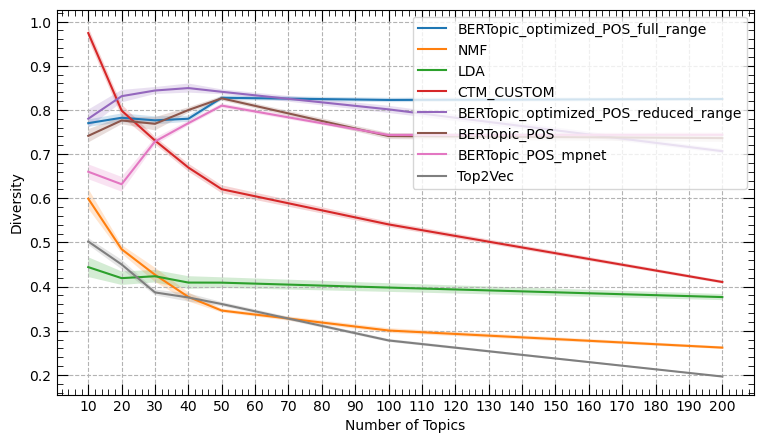

In [29]:
for dataset in results.get_keys()["basic"]:
    if dataset != "all":
        fig = results.plot_results(dataset, x="nr_topics", y="diversity", xlabel="Number of Topics",
                                    ylabel="Diversity", figsize=(9, 5), confidence_interval=True)
        fig.savefig(f"../../latex/thesis/figures/{dataset}_diversity.pdf", bbox_inches='tight')

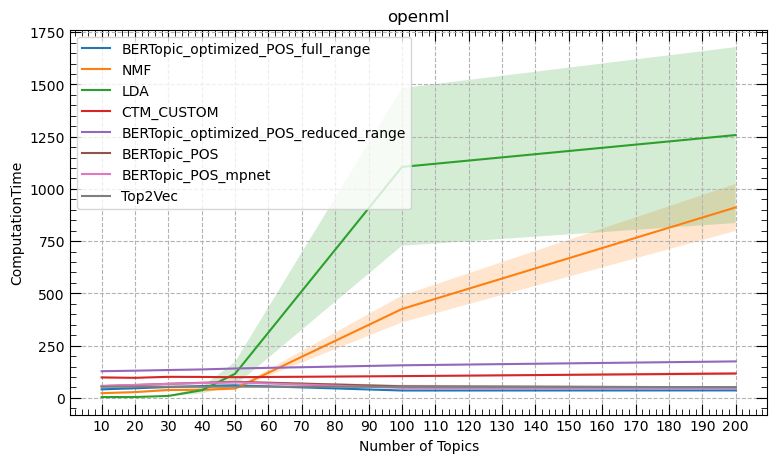

In [20]:
# Plot computation times with CTM
for dataset in results.get_keys()["basic"]:
    if dataset != "all":
        fig = results.plot_results(dataset, title=dataset, x="nr_topics", y="ComputationTime", xlabel="Number of Topics",
                                    ylabel="ComputationTime", figsize=(9, 5), confidence_interval=True)

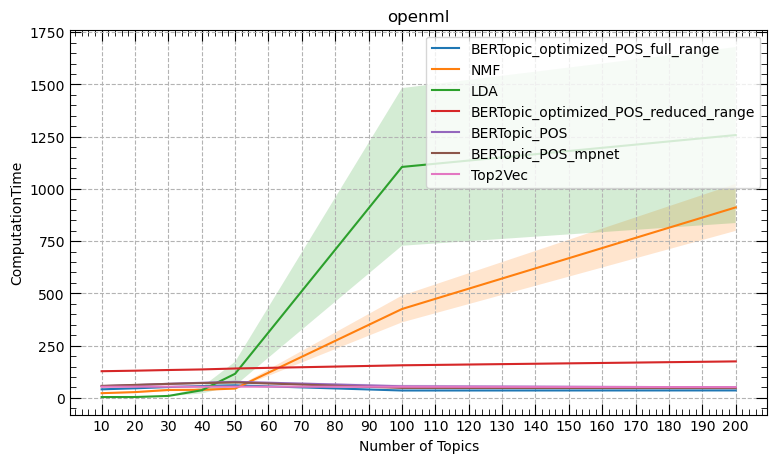

In [21]:
# Plot computation times without CTM
for dataset in results.get_keys()["basic"]:
    if dataset != "all":
        fig = results.plot_results(dataset, title=dataset, x="nr_topics", y="ComputationTime", xlabel="Number of Topics",
                                    ylabel="ComputationTime", figsize=(9, 5), confidence_interval=True, with_ctm=False)

In [22]:
dir(results.visualize_table())

['__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_apply_index',
 '_check_trim',
 '_compute',
 '_copy',
 '_display_funcs',
 '_display_funcs_columns',
 '_display_funcs_index',
 '_generate_body_row',
 '_generate_col_header_row',
 '_generate_index_names_row',
 '_generate_trimmed_row',
 '_get_numeric_subset_default',
 '_map',
 '_render',
 '_render_html',
 '_render_latex',
 '_render_string',
 '_repr_html_',
 '_repr_latex_',
 '_todo',
 '_translate',
 '_translate_body',
 '_translate_header',
 '_translate_latex',
 '_update_ctx',
 '_update_ctx_header',
 'apply',
 'apply_index',
 'applymap',
 'applymap_index',
 'background_gradient',
 'bar

In [23]:
table = results.visualize_table()
table
# save table as latex
# results.visualize_table().to_latex("../../latex/thesis/tables/results.tex", index=False)

In [24]:
# save table as latex

with open('../../latex/thesis/figures/results_table.tex', 'w') as f:
    table.to_latex(f)

In [25]:
data = {
    'Model': [
        'BERTopic_optimized_POS_reduced_range',
        'BERTopic_POS', 'BERTopic_optimized_POS_full_range', 
        'BERTopic_POS_mpnet'
    ],
    'npmi': [-0.029, 0.013, 0.014, 0.019],
    'diversity': [0.808, 0.770, 0.798, 0.727]
}

corr_df = pd.DataFrame(data)

In [26]:
correlation = corr_df[['npmi', 'diversity']].corr()

print(correlation)

               npmi  diversity
npmi       1.000000  -0.669102
diversity -0.669102   1.000000
